<a href="https://colab.research.google.com/github/parneetsingh022/tensorflow-deep-learning/blob/main/02_neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to neural network classification with TensorFlow

Different types of classification problems:
* Binary classification
* Multiclass classification
* Multilable classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

# Our data is a little hard to understand right now... let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], 'X1':X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


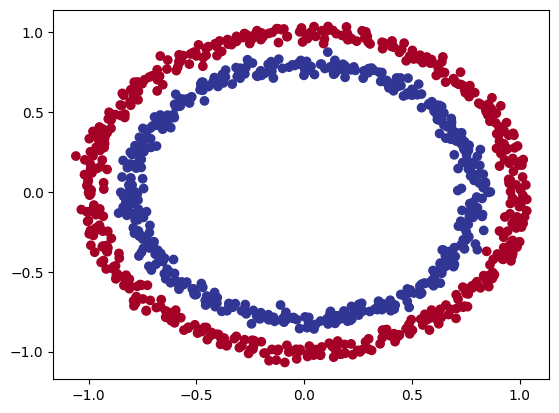

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y,  cmap=plt.cm.RdYlBu)

# Creating training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sigmoid function
This function provides an output between 0 and 1 and is used for binary classification where the labels of the output are either 0 or one. At the output node if the sigmoid function returns the output near 0, it means the class is 0 and if it is close to 1 the output is 1.


$$σ(x) = \frac{1}{1+e^{-x}}$$

In [ ]:
# Creating a simple model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
              )

model.fit(X_train,y_train,epochs=5,verbose=0)

In [ ]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 1s 8ms/step - loss: 0.6877 - accuracy: 0.5225


[0.6876764893531799, 0.5224999785423279]

# Improving the model by adding more layers and nodes

Following model as we see has an accuracy of 100% accuracy on the training data which suggests that the model is what we call *overfitted* but it's accuracy on test data is also ~99% showing that it is also very good at new data!

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_2.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
model_2.evaluate(X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 1.0000


[0.014847028069198132, 1.0]

In [ ]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9950


[0.030028047040104866, 0.9950000047683716]

# Adding some dropout layers to get rid of possible overfitting

`Model 3` gives ~99% percent accuracy for both training and test data which is pretty good!

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_3.fit(X_train,y_train,epochs=30,verbose=1)

model_3.evaluate(X_train,y_train)

Epoch 1/30
25/25 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.4913
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4750
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5600
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5638
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5663
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6112
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6325
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.6675
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7113
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7812
Epoch 11/30
25/25 [

[0.15666581690311432, 0.9850000143051147]

In [ ]:
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9650


[0.1978205293416977, 0.9649999737739563]

Text(0.5, 0, 'epoch')

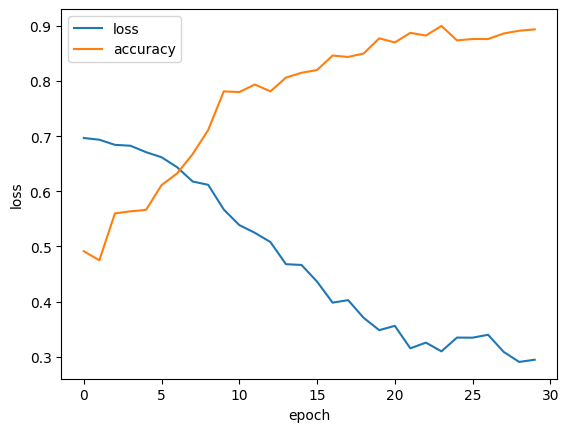

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

# Visualizing our model

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, feature (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max,200),
      np.linspace(y_min, y_max,200))

  # create X value (we're going to make predictions on these)
  x_in  = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if (len(y_pred[0])> 1):
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

1250/1250 [==============================] - 2s 1ms/step
doing binary classification


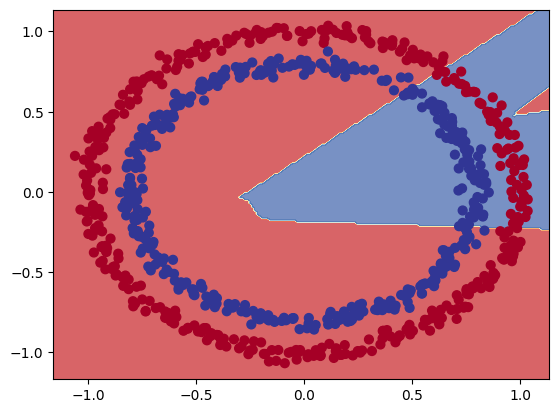

In [ ]:
#plotting decision boundary for first model
plot_decision_boundary(model, X_train, y_train)

1250/1250 [==============================] - 2s 2ms/step
doing binary classification
1250/1250 [==============================] - 4s 3ms/step
doing binary classification


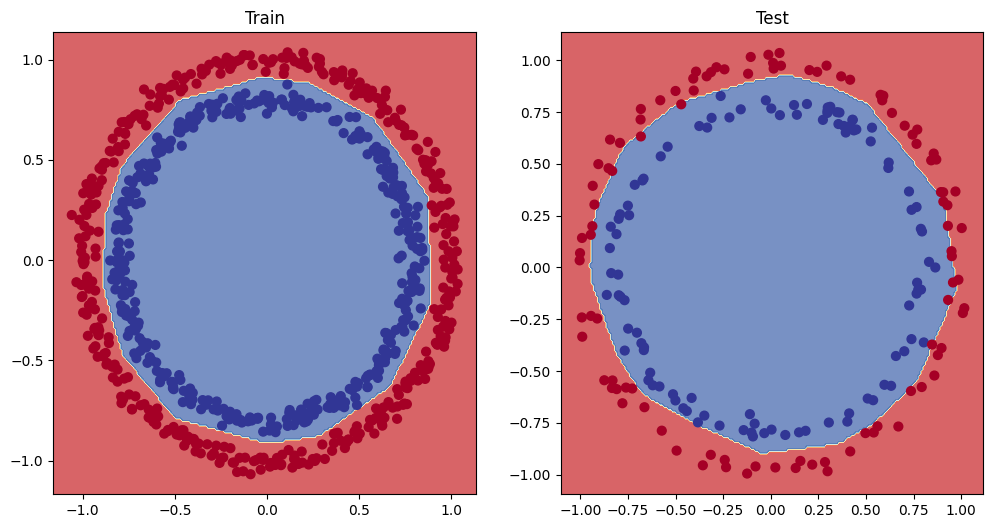

In [ ]:
#plotting decision boundary for model 3
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test, y_test)

# Finding ideal learning rate using callbacks

To find the learning rate ( the learing rate where the loss decreasses the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a call back as an extra piece of functionality, you can add to your model *while* it is training.
* Another model (we could use the same one as above)
* A modified loss curve above

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

#creating a learning rate call back

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_4 = model_4.fit(X_train,y_train,epochs=100, callbacks=[lr_schedular])


model_3.evaluate(X_train,y_train)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7076 - accuracy: 0.5063 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

[0.15666581690311432, 0.9850000143051147]

<Axes: >

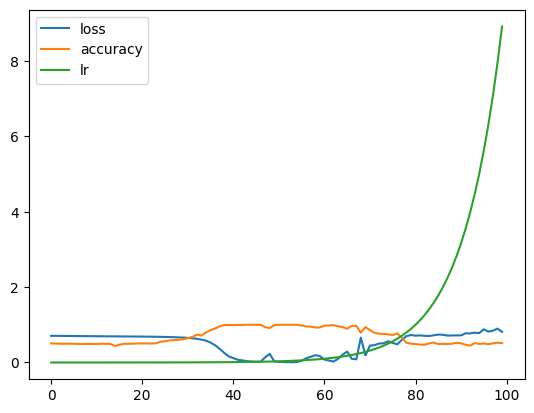

In [ ]:
pd.DataFrame(history_4.history).plot()

Text(0.5, 1.0, 'Learning rate vs. Loss')

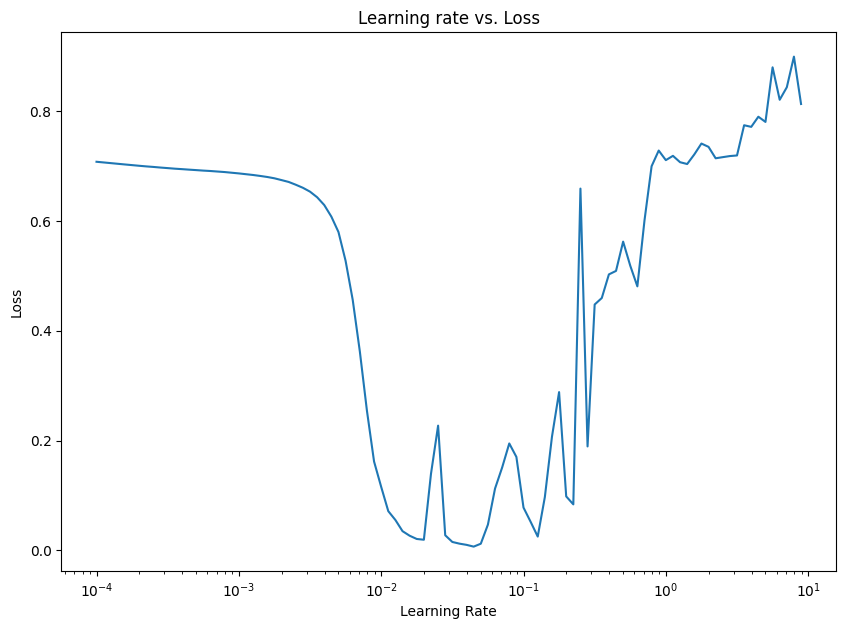

In [ ]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_4.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
(10**-2, 10**-1)

(0.01, 0.1)

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])


history_5 = model_5.fit(X_train,y_train,epochs=25)


model_5.evaluate(X_test,y_test)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5013
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5800
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6988
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5615 - accuracy: 0.7675
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.9325
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.9638
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9737
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9925
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9962
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9937
Epoch 11/25
25/25 [

[0.025133883580565453, 0.9900000095367432]

<Axes: >

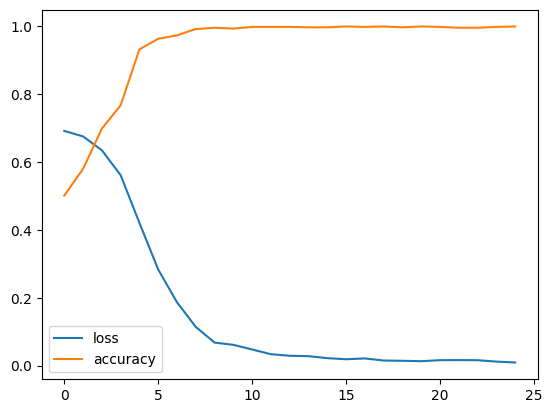

In [ ]:
pd.DataFrame(history_5.history).plot()

1250/1250 [==============================] - 2s 2ms/step
doing binary classification
1250/1250 [==============================] - 2s 1ms/step
doing binary classification


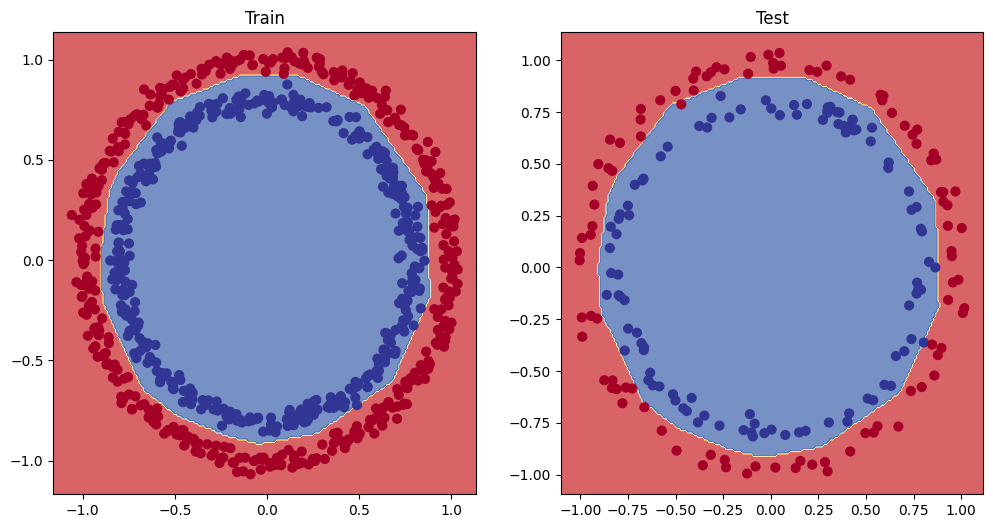

In [ ]:
#plotting decision boundary for model 3
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,X_test, y_test)

# Classification evaluation methods

| Metric Name      | Metric Formula                                                             | Code                                                   | When to use                                                                                                                    |
|------------------|----------------------------------------------------------------------------|--------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| Accuracy         | **Accuracy**=$\frac{tp+tn}{tp+tn+fp+fn}$                                   | tf.keras.metrics.Accuracy()                            | Default metric for classification problem. Not the best for imbalanced classes.                                                |
| Precision        | **Precision** = $\frac{tp}{tp + fp}$                                       | tf.keras.metrics.Precision()                           | Higher precision leads to less false positives.                                                                                |
| Recall           | **Recall** = $\frac{tp}{tp + fn}$                                          | tf.keras.metrics.Recall()                              | Higher recall leads to less false negatives.                                                                                   |
| F1-score         | **F1-score** = $2 \frac{precision \cdot recall}{precision + recall}$ | sklearn.metrics.f1_score()                             | Combination of precision and recall, usually a good over metric for a classification model.                                    |
| Confusion matrix | **NA**                                                                     | Custojm function or **sklearn.metrics.confusion_matrix()** | When comparing predictions to truth labels to see where model gets confused. |

📓**Note:** Unfortunately, you can't have both precision and recall high. If you increase precision, it will reduce recall, and vice versa. This is called the **precision/recall tradeoff**.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_5.predict(X_test)
# y_pred is in the form of prediction probability and we have to convert it into
# 0's and 1's.

#create our confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[99,  1],
       [ 1, 99]])

In [ ]:
tf.math.confusion_matrix(y_test,tf.round(y_preds))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99,  1],
       [ 1, 99]], dtype=int32)>

In [ ]:
# plotting confusion metrix
import itertools


def plot_confusion_metrix(y_test,y_preds,classes=False):
  figsize = (10,10)

  # create confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np. newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)


  # Set the threshhold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)


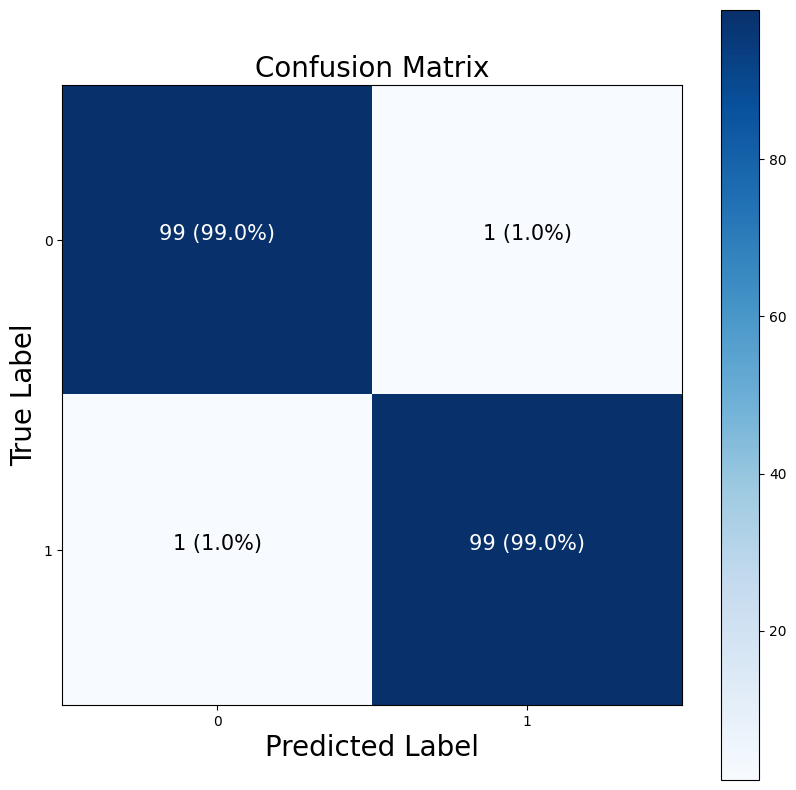

In [ ]:
plot_confusion_metrix(y_test,y_preds)